# Movie Review IMBD Data Set Model Training
#### First, we'll import the necessary libraries and load the dataset. For this example, we'll use the IMDb movie review dataset, which consists of 50,000 movie reviews labeled as positive or negative. We'll split the data into training and testing sets, with 40,000 reviews for training and 10,000 reviews for testing.

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten,Conv1D,GlobalMaxPooling1D, LSTM, GRU, SimpleRNN
from keras.utils import pad_sequences
from tqdm.keras import TqdmCallback


In [4]:
# Load the dataset
vocab_size = 300
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to a fixed length
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [5]:
X_train.shape

(25000, 500)

## Multi layer Perceptron (MLP)
## Without embedding
- we'll create an MLP without using word embeddings. This model will consist of an input layer with the same number of neurons as the length of the input sequences, followed by a hidden layer with 128 neurons and a ReLU activation function, and finally an output layer with a single neuron and a sigmoid activation function. We'll use binary cross-entropy as the loss function and the Adam optimizer.
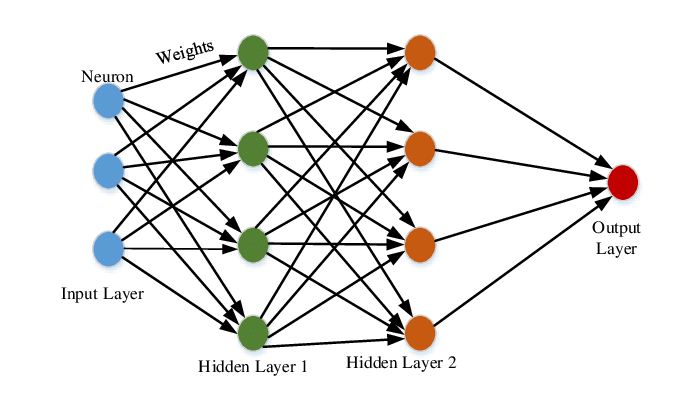

In [13]:
%time
# Create an MLP without embeddings
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(max_len,)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])

Wall time: 0 ns


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 4s 10ms/step - loss: 66.7169 - accuracy: 0.5007 - val_loss: 15.6994 - val_accuracy: 0.5057
Epoch 2/3
391/391 [==============================] - 4s 9ms/step - loss: 5.2321 - accuracy: 0.5370 - val_loss: 2.0709 - val_accuracy: 0.5030
Epoch 3/3
391/391 [==============================] - 3s 9ms/step - loss: 1.2692 - accuracy: 0.5356 - val_loss: 1.3039 - val_accuracy: 0.5004


In [14]:

# Predict using the MLP without embeddings
y_pred = model1.predict(X_test)
y_pred = np.round(y_pred)

# Evaluate the MLP without embeddings
score = model1.evaluate(X_test, y_test, verbose=0)
print('MLP without embeddings - Test loss:', score[0])
print('MLP without embeddings - Test accuracy:', score[1])

782/782 [==============================] - 2s 3ms/step
MLP without embeddings - Test loss: 1.3038749694824219
MLP without embeddings - Test accuracy: 0.5003600120544434


## With embedding
- Now let's create an MLP that uses word embeddings. We'll start by creating an embedding layer with 32 dimensions, followed by a flatten layer to convert the 2D output of the embedding layer to a 1D vector. We'll then add a hidden layer with 128 neurons and a ReLU activation function, and finally an output layer with a single neuron and a sigmoid activation function. We'll use the same loss function, optimizer, and metrics as before.

In [15]:
# Create an MLP with embeddings
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 21s 51ms/step - loss: 0.4935 - accuracy: 0.7159 - val_loss: 0.2979 - val_accuracy: 0.8720
Epoch 2/3
391/391 [==============================] - 20s 52ms/step - loss: 0.1832 - accuracy: 0.9309 - val_loss: 0.3273 - val_accuracy: 0.8648
Epoch 3/3
391/391 [==============================] - 19s 47ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.4812 - val_accuracy: 0.8436


### Convolutional Neural Network (CNN)
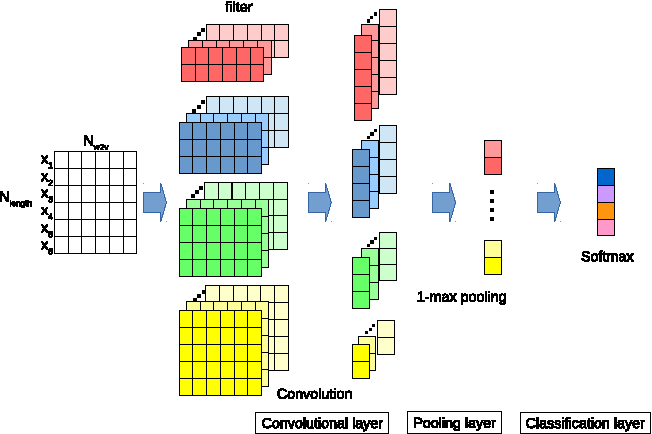

In [17]:
# Create a CNN
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])

# Predict and evaluate the CNN
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

score = model.evaluate(X_test, y_test, verbose=0)
print('CNN - Test loss:', score[0])
print('CNN - Test accuracy:', score[1])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 25s 61ms/step - loss: 0.5312 - accuracy: 0.7296 - val_loss: 0.3635 - val_accuracy: 0.8418
Epoch 2/3
391/391 [==============================] - 24s 62ms/step - loss: 0.2934 - accuracy: 0.8798 - val_loss: 0.2914 - val_accuracy: 0.8778
Epoch 3/3
782/782 [==============================] - 6s 8ms/step
CNN - Test loss: 0.2844817340373993
CNN - Test accuracy: 0.8801599740982056


## Long short term Memory (LSTM) 
- In this example, we use the IMDb movie review dataset and create an LSTM model to classify movie reviews as positive or negative. The input sequences are padded to a fixed length of 500, and the model uses an embedding layer to map the words to dense vectors of size 32. The LSTM layer has 100 memory units and a dropout rate of 0.2 to prevent overfitting. Finally, the output layer uses a sigmoid activation function to produce a binary classification output.

- The model is trained on the training set for 3 epochs with a batch size of 64, and the performance is evaluated on the test set. The predicted outputs are rounded to either 0 or 1, and the accuracy and loss are printed out.
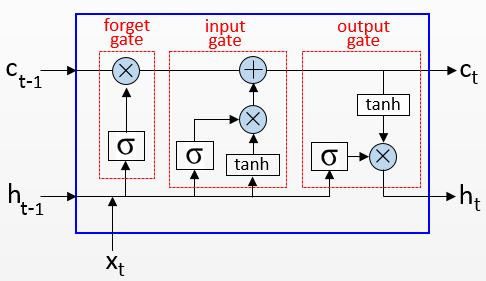

In [18]:
# Create an LSTM
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])

# Predict and evaluate the LSTM
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

score = model.evaluate(X_test, y_test, verbose=0)
print('LSTM - Test loss:', score[0])
print('LSTM - Test accuracy:', score[1])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 1184s 3s/step - loss: 0.4978 - accuracy: 0.7487 - val_loss: 0.5176 - val_accuracy: 0.7489
Epoch 2/3
391/391 [==============================] - 798s 2s/step - loss: 0.3440 - accuracy: 0.8507 - val_loss: 0.3231 - val_accuracy: 0.8660
Epoch 3/3
782/782 [==============================] - 143s 183ms/step
LSTM - Test loss: 0.30751359462738037
LSTM - Test accuracy: 0.8750399947166443


## Gated Recurrent Unit (GRU )
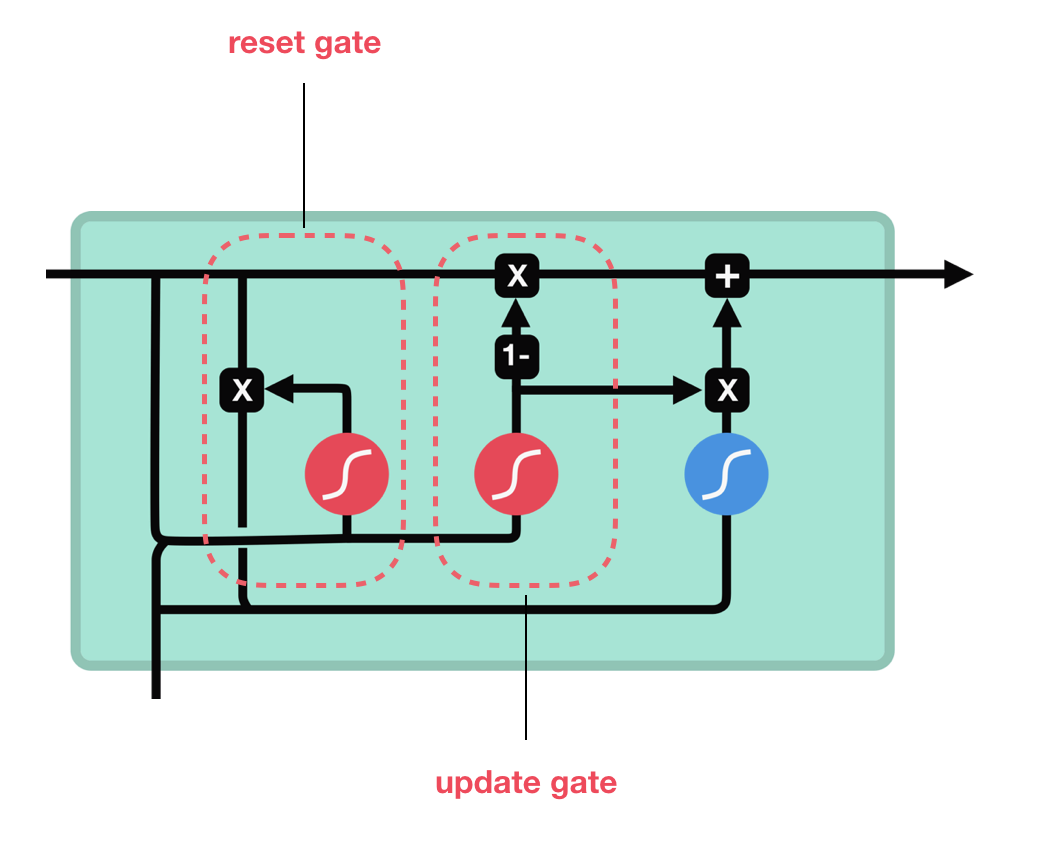

In [19]:
# Create a GRU model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])

# Predict and evaluate the GRU
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

score = model.evaluate(X_test, y_test, verbose=0)
print('GRU - Test loss:', score[0])
print('GRU - Test accuracy:', score[1])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 635s 2s/step - loss: 0.5389 - accuracy: 0.7046 - val_loss: 0.4405 - val_accuracy: 0.7999
Epoch 2/3
391/391 [==============================] - 686s 2s/step - loss: 0.3024 - accuracy: 0.8743 - val_loss: 0.2944 - val_accuracy: 0.8770
Epoch 3/3
782/782 [==============================] - 129s 165ms/step
GRU - Test loss: 0.30341795086860657
GRU - Test accuracy: 0.8770800232887268


## Recurrent Neural Network (RNN)
- This code is similar to the GRU and LSTM examples, with the main difference being that we use a SimpleRNN layer instead of an LSTM or GRU layer. In this case, we still use an embedding layer to map the words to dense vectors, and the SimpleRNN layer has 100 memory units and a dropout rate of 0.2 to prevent overfitting. We also use a sigmoid activation function in the output layer for binary classification.

- The model is trained on the training set for 3 epochs with a batch size of 64, and the performance is evaluated on the test set. The predicted outputs are rounded to either 0 or 1, and the accuracy and loss are printed out.
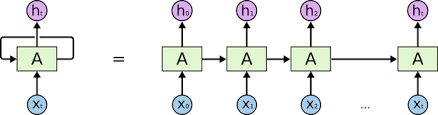

In [20]:
# Create a RNN model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, callbacks = [TqdmCallback()])

# Predict and evaluate the RNN
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

score = model.evaluate(X_test, y_test, verbose=0)
print('RNN - Test loss:', score[0])
print('RNN - Test accuracy:', score[1])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
391/391 [==============================] - 321s 816ms/step - loss: 0.7080 - accuracy: 0.5010 - val_loss: 0.6907 - val_accuracy: 0.5450
Epoch 2/3
391/391 [==============================] - 313s 802ms/step - loss: 0.6953 - accuracy: 0.5170 - val_loss: 0.6888 - val_accuracy: 0.5405
Epoch 3/3
782/782 [==============================] - 56s 72ms/step
RNN - Test loss: 0.6844030618667603
RNN - Test accuracy: 0.5761200189590454


## The End